## Импортируем pandas

In [1]:
import pandas as pd

## Считываем данные с нужным разделителем

In [2]:
df = pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Выбираем нужные столбцы

In [3]:
columns = ["age", "job", "marital", "education", "balance", "housing","contact", "day",
           "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]

## Проверяем признаки на наличие пропущенных значений

In [4]:
df_new = df[columns]
df_new.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Вопрос 1

**Находим самое частое значение для столбца `education`**

In [5]:
df_new["education"].mode()

0    secondary
Name: education, dtype: object

**Ответ: `secondary`**

## Вопрос 2
**Оцениваем признаки и их тип данных**

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


**Находим числовые признаки**

In [7]:
int_features = df_new.select_dtypes(include="int64").columns.tolist()
int_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

**Строим `heatmap` на основе корреляционной матрицы**

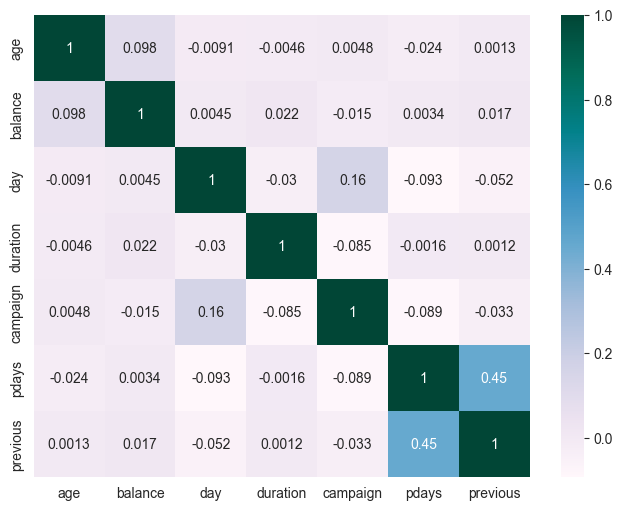

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_new[int_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="PuBuGn")
plt.show()

**Проверяем, сколько уникальных значений принимает целевая переменная**

In [9]:
df_new["y"].unique()

array(['no', 'yes'], dtype=object)

**Кодируем целевую переменную**

In [10]:
df_new["y"] = df_new["y"].replace({"yes": 1, "no": 0})

C:\Users\user\AppData\Local\Temp\ipykernel_8756\1289374451.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new["y"] = df_new["y"].replace({"yes": 1, "no": 0})
C:\Users\user\AppData\Local\Temp\ipykernel_8756\1289374451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["y"] = df_new["y"].replace({"yes": 1, "no": 0})


**Разделяем данные на тренировочную, валидационную и тестовую выборки. Для начала отделим целевую переменную от остального датасета**

In [11]:
from sklearn.model_selection import train_test_split

x = df_new.drop(["y"], axis=1)
y = df_new["y"]

**Разделяем на _temp_ и _test_**

In [12]:
x_temp, x_test, y_temp, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

**Разделяем на _train_ и _validation_**

In [13]:
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp,
    test_size=0.2,
    random_state=42
)

**Ответ: наибольшая корреляция у `age` и `balance`**

## Вопрос 3
**Для расчёта взаимной информации находим категориальные признаки**

In [14]:
from sklearn.feature_selection import mutual_info_classif

cat_features = df_new.select_dtypes(include="object").columns.tolist()
cat_features

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

**Делаем подсчет взаимной информации между `cat_features` и `y`**

In [15]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

x_train_encoded = x_train.copy()

for col in cat_features:
    le = LabelEncoder()
    x_train_encoded[col] = le.fit_transform(x_train_encoded[col])

score = mutual_info_classif(x_train_encoded[cat_features], y_train)
score
# np.round(score, 2)

array([0.0087449 , 0.00608291, 0.00375497, 0.01250125, 0.01649333,
       0.0267616 , 0.0351957 ])

**Визуализируем взаимную информацию с помощью `barplot`**

C:\Users\user\AppData\Local\Temp\ipykernel_8756\2481997306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(result, x="Взаимная информация", y="Признак", palette="viridis")


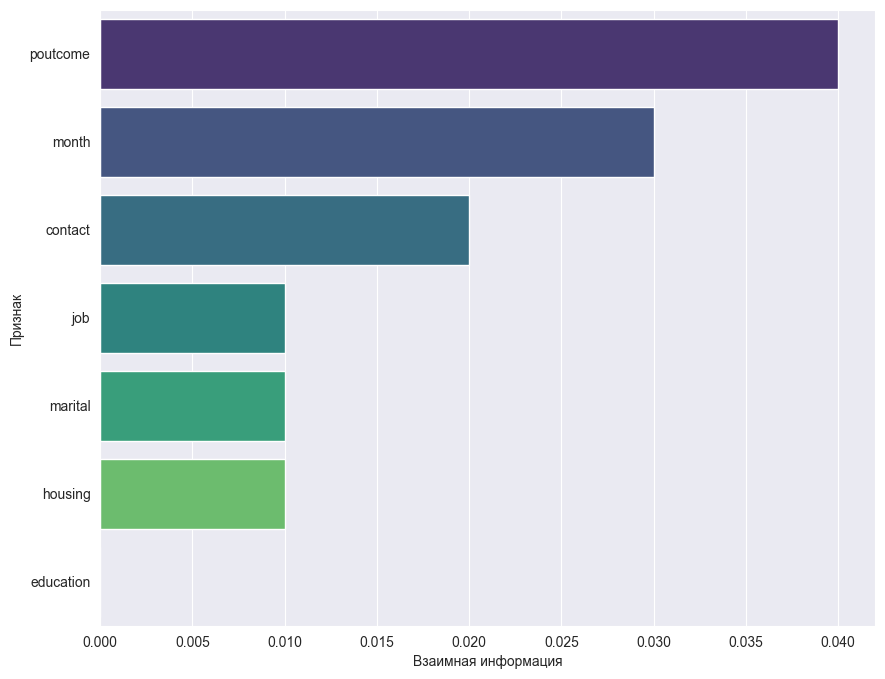

In [16]:
result = pd.DataFrame({
    "Признак": cat_features,
    "Взаимная информация": np.round(score, 2)
}).sort_values("Взаимная информация", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(result, x="Взаимная информация", y="Признак", palette="viridis")
plt.xlabel("Взаимная информация")
plt.ylabel("Признак")
plt.show()

**Ответ: наибольшая взаимная информация наблюдается у переменной `poutcome`**

## Вопрос 4
**Закодируем категориальные признаки с помощью _one-hot_ кодирования**

In [17]:
cat_cols = x_train.select_dtypes(include=["object"]).columns

x_train = pd.get_dummies(x_train, columns=cat_cols)
x_val = pd.get_dummies(x_val, columns=cat_cols)

**Проверяем, что в тренировочной и валидационной выборке одинаковые категориальные признаки**

In [18]:
x_train, x_val = x_train.align(x_val, join="left", axis=1, fill_value=0)

**Обучаем логистическую регрессию на тренировочном наборе данных**

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


**Рассчитываем точность на валидационном наборе данных и округляем её до 2-х знаков**

In [20]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_val)
acc = np.round(accuracy_score(y_val, pred), 2)
print(acc)

0.9


**Ответ: получаем значение _accuracy_ = 0.9**

## Вопрос 5
**Для начала каждому признаку сопоставим название столбца/столбцов, связанных с ним в датасете**

In [21]:
test_features = ["age", "balance", "marital", "previous"]

feature_columns = {}

for feature in test_features:
    if feature in x_train.columns:
        feature_columns[feature] = [feature]
    else:
        feature_columns[feature] = [col for col in x_train.columns if col.startswith(feature + "_")]

feature_columns

{'age': ['age'],
 'balance': ['balance'],
 'marital': ['marital_divorced', 'marital_married', 'marital_single'],
 'previous': ['previous']}

**Пользуясь техникой _feature elimination_ поочередно исключаем каждый признак и подсчитываем точность**

In [22]:
diff = {}

for feature, cols in feature_columns.items():
    x_train_temp = x_train.drop(columns=cols)
    x_val_temp = x_val.drop(columns=cols)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(x_train_temp, y_train)
    pred = model.predict(x_val_temp)

    acc_new = accuracy_score(y_val, pred)

    diff[feature] = acc - acc_new

**Смотрим итоговый результат**

In [23]:
diff

{'age': np.float64(-0.001990599944705518),
 'balance': np.float64(-0.0012994194083494337),
 'marital': np.float64(-0.001990599944705518),
 'previous': np.float64(-0.0012994194083494337)}

**Находим наименьшую разницу**

In [24]:
min(diff.items(), key=lambda x: x[1])

('age', np.float64(-0.001990599944705518))

**Ответ: наименьшая разница у признака `age` и её значение равно -0.001990599944705518**

## Вопрос 6
**Обучаем логистическую регрессию с регуляризацией. Без параметра `C = 0`, так как он равен обратному значению коэффициента  $С = \frac{1}{\lambda}$**

In [25]:
# C_values = [0, 0.01, 0.1, 1, 10]
C_values = [0.01, 0.1, 1, 10]

res = {}

for C in C_values:
    model = LogisticRegression(solver="liblinear", C=C, max_iter=1000, random_state=42)
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    accuracy = np.round(accuracy_score(y_val, pred), 3)
    res[C] = accuracy

**После обучения модели со всеми признаками получаем точность для каждого предсказания**

In [26]:
res

{0.01: np.float64(0.899),
 0.1: np.float64(0.902),
 1: np.float64(0.902),
 10: np.float64(0.901)}

**Находим максимальную точность**

In [27]:
max(res.items(), key=lambda x: x[1])

(0.1, np.float64(0.902))

**Ответ: `C = 0.1` даёт лучшую точность 0.902**

## Ответы на вопросы
**1. Ответ: `secondary`**
**2. Ответ: наибольшая корреляция у `age` и `balance`**
**3. Ответ: наибольшая взаимная информация наблюдается у переменной `poutcome`**
**4. Ответ: получаем значение _accuracy_ = 0.9**
**5. Ответ: наименьшая разница у признака `age` и её значение равно -0.001990599944705518**
**6. Ответ: `C = 0.1` даёт лучшую точность 0.902**
